## Importing the required library 

In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.cluster import MeanShift, estimate_bandwidth

#Magical Command to execute multiple query in one row
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

## Importing the data


In [2]:
data = pd.read_csv("Jan - Dec 2019_RFM_Initial.csv")

## Exploratory Data Analysis

#### 1. Checking top five data

In [3]:
data.head(2)

,Customer_Name,Customer_ID,Order_No,Order_Date,Invoiced,SKU_Code,Quantity,City
0,Natasha Sethi,10993,M0110013,2019-08-22,1797.0,SWM17614C0512L,1,Gurgaon
1,Sneha Ganesan,6206,M0110014,2019-08-22,995.0,BRA72501C060636B,1,Mumbai


#### 2. Checking bottom five data

In [4]:
data.tail(2)

,Customer_Name,Customer_ID,Order_No,Order_Date,Invoiced,SKU_Code,Quantity,City
19115,Arshpreet Kaur,2075,M02866,2019-12-17,1147.5,F0007C060934DD,1,Chandigaeh
19116,Nandita Dave,10952,M02870,2019-12-23,2295.0,E0006C000438DD,1,Kolkata


#### 3. Statistics information about data

In [5]:
data.describe()

,Customer_ID,Invoiced,Quantity
count,19117.000000,19117.000000,19117.000000
mean,10320.195114,793.912288,1.035466
std,6005.041538,511.413797,0.221981
min,2.000000,0.000000,1.000000
25%,4669.000000,495.000000,1.000000
50%,10453.000000,647.500000,1.000000
75%,15565.000000,990.000000,1.000000
max,20608.000000,6190.000000,8.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19117 entries, 0 to 19116
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Name  19117 non-null  object 
 1   Customer_ID    19117 non-null  int64  
 2   Order_No       19117 non-null  object 
 3   Order_Date     19117 non-null  object 
 4   Invoiced       19117 non-null  float64
 5   SKU_Code       19117 non-null  object 
 6   Quantity       19117 non-null  int64  
 7   City           19084 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


#### Box plot between customer name and invoce 

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'Numeric Features')

Text(0, 0.5, 'Values')

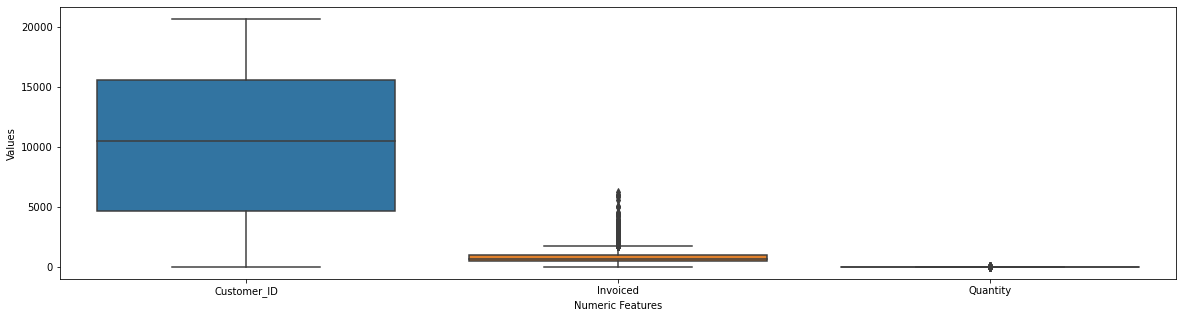

In [7]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data)
plt.xlabel("Numeric Features")
plt.ylabel("Values")

### Kmean



In [8]:
import datetime as dt
maxDate = dt.datetime(2019,12,31)

In [9]:
# change the date time column datetime
data["Order_Date"]=pd.to_datetime(data['Order_Date'])
data["date"]=pd.DatetimeIndex(data['Order_Date']).date

In [10]:
data_rfm=data[['Customer_ID','Customer_Name','Order_No','Order_Date','Invoiced','SKU_Code','City']]
data_rfm

,Customer_ID,Customer_Name,Order_No,Order_Date,Invoiced,SKU_Code,City
0,10993,Natasha Sethi,M0110013,2019-08-22,1797.0,SWM17614C0512L,Gurgaon
1,6206,Sneha Ganesan,M0110014,2019-08-22,995.0,BRA72501C060636B,Mumbai
2,2278,ASHUTOSH GARG,M0110016,2019-08-22,327.0,PAN26403C0676M,Chandigaeh
3,3867,Deepika Chawla,M0110018,2019-08-23,0.0,BRA10301C032434C,Dehradun
4,2278,ASHUTOSH GARG,M0110019,2019-08-23,1737.0,SLP70202C0676M,Chandigaeh
...,...,...,...,...,...,...,...
19112,2075,Arshpreet Kaur,M02866,2019-12-17,2795.0,F0008C062034DD,Chandigaeh
19113,2075,Arshpreet Kaur,M02866,2019-12-17,1497.5,F0001C052634DD,Chandigaeh
19114,2075,Arshpreet Kaur,M02866,2019-12-17,2295.0,F0007C061034DD,Chandigaeh
19115,2075,Arshpreet Kaur,M02866,2019-12-17,1147.5,F0007C060934DD,Chandigaeh


rfm_df = data_rfm.groupby('Customer_Name').agg({'Order_Date': lambda x: (maxDate - x.max()).days,
                                        'Order_No': lambda x: len(x), 
                                        'Invoiced': lambda x: x.sum(),
                                        'Gross_Margin_Rs':lambda x: x.sum(),
                                        'SKU_Code': lambda x: x.nunique(),
                                        'City': lambda x: x.unique()})
rfm_df.rename(columns={'Order_Date': 'Recency', 
                         'Order_No': 'Frequency', 
                         'Invoiced': 'Monetary',
                         'Gross_Margin_Rs':'Profit',
                         'SKU_Code': 'numProduct',
                         'City': 'City'}, inplace=True)

In [11]:
rfm_df = data_rfm.groupby('Customer_ID').agg({'Order_Date': lambda x: (maxDate - x.max()).days,
                                        'Order_No': lambda x: len(x), 
                                        'Invoiced': lambda x: x.sum(),
                                        'SKU_Code': lambda x: x.nunique(),
                                        'City': lambda x: x.unique()})
rfm_df.rename(columns={'Order_Date': 'Recency', 
                         'Order_No': 'Frequency', 
                         'Invoiced': 'Monetary',
                         'SKU_Code': 'numProduct',
                         'City': 'City'}, inplace=True)

In [12]:
rfm_df.head()

,Recency,Frequency,Monetary,numProduct,City
Customer_ID,,,,,
2,13,4,2612.5,4,thane
4,40,2,60.2,2,Gurgaon
6,43,1,611.6,1,Greater Noida
7,37,1,611.6,1,Greater Noida
9,152,1,957.0,1,Kalyan


In [13]:
rfm_df.sort_values('Recency',ascending=False).head(5)

,Recency,Frequency,Monetary,numProduct,City
Customer_ID,,,,,
12959,364,1,6190.0,1,Pune
12068,364,1,1148.0,1,Delhi
8629,364,2,844.0,2,CHENNAI
3221,364,2,1842.0,2,NEW PANVEL
17346,364,1,998.0,1,Mumbai


In [14]:
rfm_df.sort_values('Frequency',ascending=False).head(5)

,Recency,Frequency,Monetary,numProduct,City
Customer_ID,,,,,
12280,51,40,38724.76,26,"[Mangalore, Mangaluru]"
15626,89,26,10256.80,26,Kanpur
11532,121,21,15144.00,21,Ghaziabad
312,18,20,14993.00,20,Surat
6522,55,19,13478.52,19,Bangalore


In [15]:
rfm_df.sort_values('Monetary',ascending=False).head(5)

,Recency,Frequency,Monetary,numProduct,City
Customer_ID,,,,,
12280,51,40,38724.76,26,"[Mangalore, Mangaluru]"
20284,98,10,19052.51,10,Bangalore
1158,100,17,17006.00,17,Rajnandgaon
3493,153,14,16965.01,12,Bangalore
15821,291,7,16913.00,5,Trivandrum


#plt.figure(figsize=(20,5))
sns.boxplot(data=rfm_df['Recency'])

sns.boxplot(data=rfm_df['Frequency'])

sns.boxplot(data=rfm_df['Monetary'])

sns.boxplot(data=rfm_df['Profit'])

sns.boxplot(data=rfm_df['numProduct'])

In [16]:
data_Clus = pd.DataFrame(data['Customer_ID'].unique())
data_Clus.columns = ['Customer_ID']

#create a dataframe with customer id and first purchase date in 
data_first_purchase = data.groupby('Customer_ID').Order_Date.min().reset_index()
data_first_purchase.columns = ['Customer_ID','FPD']

#create a dataframe with customer id and last purchase date 
data_last_purchase = data.groupby('Customer_ID').Order_Date.max().reset_index()
data_last_purchase.columns = ['Customer_ID','LPD']


#merge two dataframes
data_Clus1 = pd.merge(data_last_purchase,data_first_purchase,on='Customer_ID',how='left')

data_Clus1['Tenure'] = (data_last_purchase['LPD']- data_first_purchase['FPD']).dt.days

data_Clus = pd.merge(data_Clus, data_Clus1[['Customer_ID','LPD','FPD','Tenure']],on='Customer_ID',how='left')

In [17]:
data_Clus=pd.merge(data_Clus,rfm_df,on='Customer_ID',how='left')
data_Clus

,Customer_ID,LPD,FPD,Tenure,Recency,Frequency,Monetary,numProduct,City
0,10993,2019-08-22,2019-08-22,0,131,1,1797.0,1,Gurgaon
1,6206,2019-12-27,2019-08-02,147,4,6,5324.7,6,"[Mumbai, Pune]"
2,2278,2019-08-23,2019-08-22,1,130,3,3861.0,3,Chandigaeh
3,3867,2019-08-23,2019-08-23,0,130,1,0.0,1,Dehradun
4,4675,2019-08-23,2019-08-23,0,130,1,1617.0,1,Amritsar
...,...,...,...,...,...,...,...,...,...
9400,11022,2019-12-08,2019-12-08,0,23,3,3892.5,3,Ooty
9401,8994,2019-12-13,2019-12-13,0,18,1,1097.5,1,AURANGABAD
9402,4483,2019-12-16,2019-12-16,0,15,4,4782.5,4,Jalandhar
9403,2075,2019-12-17,2019-12-17,0,14,4,7735.0,4,Chandigaeh


In [18]:
data_Seg=data_Clus[['Tenure','Recency','Frequency','Monetary','numProduct']]

* Standridse the data

In [19]:
scld = MinMaxScaler(feature_range=(0,1))
arr_data_seg = scld.fit_transform(data_Seg)
df_data_seg = pd.DataFrame(arr_data_seg, columns = data_Seg.columns)
df_data_seg.shape

(9405, 5)

In [20]:
df_data_seg.head()

,Tenure,Recency,Frequency,Monetary,numProduct
0,0.000000,0.359890,0.000000,0.046404,0.00
1,0.424855,0.010989,0.128205,0.137501,0.20
2,0.002890,0.357143,0.051282,0.099704,0.08
3,0.000000,0.357143,0.000000,0.000000,0.00
4,0.000000,0.357143,0.000000,0.041756,0.00


In [21]:
df_data_seg.describe()

,Tenure,Recency,Frequency,Monetary,numProduct
count,9405.000000,9405.000000,9405.000000,9405.000000,9405.000000
mean,0.020929,0.337739,0.026478,0.041672,0.040251
std,0.097370,0.281312,0.046046,0.042536,0.068646
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112637,0.000000,0.015794,0.000000
50%,0.000000,0.230769,0.000000,0.029361,0.000000
75%,0.000000,0.530220,0.025641,0.051388,0.040000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
num_of_clusters = range (2,12)
sse = []

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(df_data_seg)
    sse.append(clusters.inertia_/100)

df_clusters = pd.DataFrame({'Cluster Numbers':num_of_clusters, 'Error_Term':sse})

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

KMeans(n_clusters=11)

In [23]:
df_clusters

,Cluster Numbers,Error_Term
0,2,3.335972
1,3,2.439822
2,4,1.660321
3,5,1.346969
4,6,1.172953
5,7,1.022610
6,8,0.934097
7,9,0.847834
8,10,0.769522
9,11,0.710263


* Elbow Method to find the number of cluster 

In [24]:
elbo_sse_ = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k).fit(df_data_seg)
    elbo_sse_.append([k, kmeans.inertia_])

In [25]:
elbo_sse_

[[1, 914.6236963271206],
 [2, 333.59518413039626],
 [3, 243.9757007433493],
 [4, 166.02038044034018],
 [5, 134.69719530116748],
 [6, 117.29480209589109],
 [7, 102.26506869095682],
 [8, 93.21005900721943]]

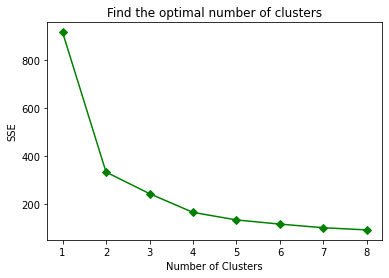

In [26]:
plt.plot(pd.DataFrame(elbo_sse_)[0], pd.DataFrame(elbo_sse_)[1],marker = "D", color='green');
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of clusters')
plt.show();

In [27]:
model = KMeans(6)
clusters=model.fit(df_data_seg)

In [28]:
data_Clus['Cluster'] = clusters.labels_+1
data_Clus.head(5)

,Customer_ID,LPD,FPD,Tenure,Recency,Frequency,Monetary,numProduct,City,Cluster
0,10993,2019-08-22,2019-08-22,0,131,1,1797.0,1,Gurgaon,1
1,6206,2019-12-27,2019-08-02,147,4,6,5324.7,6,"[Mumbai, Pune]",5
2,2278,2019-08-23,2019-08-22,1,130,3,3861.0,3,Chandigaeh,1
3,3867,2019-08-23,2019-08-23,0,130,1,0.0,1,Dehradun,1
4,4675,2019-08-23,2019-08-23,0,130,1,1617.0,1,Amritsar,1


In [29]:
data_Clus['CustID']=data_Clus.index
data_Clus

,Customer_ID,LPD,FPD,Tenure,Recency,Frequency,Monetary,numProduct,City,Cluster,CustID
0,10993,2019-08-22,2019-08-22,0,131,1,1797.0,1,Gurgaon,1,0
1,6206,2019-12-27,2019-08-02,147,4,6,5324.7,6,"[Mumbai, Pune]",5,1
2,2278,2019-08-23,2019-08-22,1,130,3,3861.0,3,Chandigaeh,1,2
3,3867,2019-08-23,2019-08-23,0,130,1,0.0,1,Dehradun,1,3
4,4675,2019-08-23,2019-08-23,0,130,1,1617.0,1,Amritsar,1,4
...,...,...,...,...,...,...,...,...,...,...,...
9400,11022,2019-12-08,2019-12-08,0,23,3,3892.5,3,Ooty,4,9400
9401,8994,2019-12-13,2019-12-13,0,18,1,1097.5,1,AURANGABAD,4,9401
9402,4483,2019-12-16,2019-12-16,0,15,4,4782.5,4,Jalandhar,4,9402
9403,2075,2019-12-17,2019-12-17,0,14,4,7735.0,4,Chandigaeh,4,9403


In [30]:
data_Clus.to_csv(r'C:\Users\Sanjeev\Desktop\Retail Project\Segmentation\Jan-Dec-2019\Clusterlabel_Jan_Dec_2019.csv',encoding="utf-8", sep=",", index = False)


,CustID,Cluster,Attribute,Value
0,0,1,Recency,0.359890
1,1,5,Recency,0.010989
2,2,1,Recency,0.357143
3,3,1,Recency,0.357143
4,4,1,Recency,0.357143


<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Attribute', ylabel='Value'>

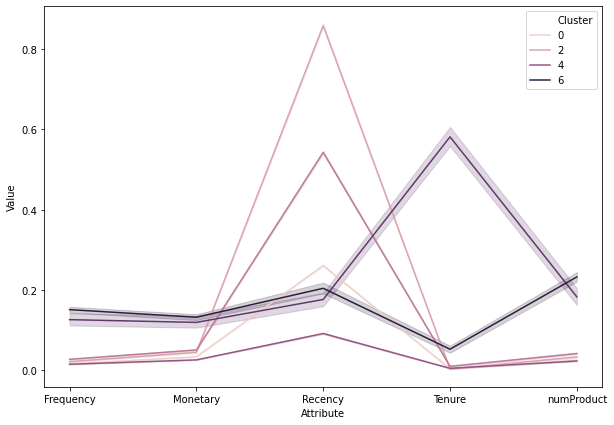

In [31]:
# Create the dataframe
df_normalized = pd.DataFrame(df_data_seg, columns=['Recency','numProduct','Tenure', 'Frequency', 'Monetary'])
df_normalized['CustID'] = data_Clus.index
df_normalized['Cluster'] = clusters.labels_ +1 
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['CustID', 'Cluster'],
                      value_vars=['Recency','numProduct','Tenure','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
plt.figure(figsize=(10,7))
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

### We infer that :-
* Cluster 0 is frequent buyer, spend less, makes less profit, bought product recently and bought less number of products. Therefore, it could be the cluster of new customers.
* Cluster 1 is frequent buyer, spent better then average amount of money, making good profit, but havn't visited recently, and bought less number of products.Therefore, it could be the cluster of new customer. it could be the cluster of churned customers.
* Cluster 2 is less frequent buyer, spend more, making great profit, but havn't visited recently, and bought more number of products. Therefore, it could be the cluster of Prospective customers.
* Cluster 3 is frequent buyer, spend less, makes average profit, but havn't visited recently, and bought less number of products. Therefore, it could be the cluster of Prospective customers to be churned.

In [32]:
df_numProduct=data_Clus[['numProduct','Cluster',"Monetary"]]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_numProduct.numProduct[df_numProduct.Cluster == 1], df_numProduct["Profit"][df_numProduct.Cluster == 1],df_numProduct["Monetary"][df_numProduct.Cluster == 1], c='red', s=60)
ax.scatter(df_numProduct.numProduct[df_numProduct.Cluster == 2], df_numProduct["Profit"][df_numProduct.Cluster == 2],df_numProduct["Monetary"][df_numProduct.Cluster == 2], c='green', s=60)
ax.scatter(df_numProduct.numProduct[df_numProduct.Cluster == 3], df_numProduct["Profit"][df_numProduct.Cluster == 3],df_numProduct["Monetary"][df_numProduct.Cluster == 3], c='cyan', s=60)
ax.scatter(df_numProduct.numProduct[df_numProduct.Cluster == 4], df_numProduct["Profit"][df_numProduct.Cluster == 4],df_numProduct["Monetary"][df_numProduct.Cluster == 4], c='magenta', s=60)
ax.scatter(df_numProduct.numProduct[df_numProduct.Cluster == 5], df_numProduct["Profit"][df_numProduct.Cluster == 5],df_numProduct["Monetary"][df_numProduct.Cluster == 5], c='blue', s=60)
ax.scatter(df_numProduct.numProduct[df_numProduct.Cluster == 6], df_numProduct["Profit"][df_numProduct.Cluster == 6],df_numProduct["Monetary"][df_numProduct.Cluster == 6], c='yellow', s=60)
ax.view_init(45, 225)

ax.set_xlabel("Number Product")
ax.set_ylabel("Profit")

ax.set_zlabel('Monetary Score')

plt.show()

<Figure size 2880x1440 with 0 Axes>

Text(0.5, 0, 'Recency')

Text(0, 0.5, 'Profit')

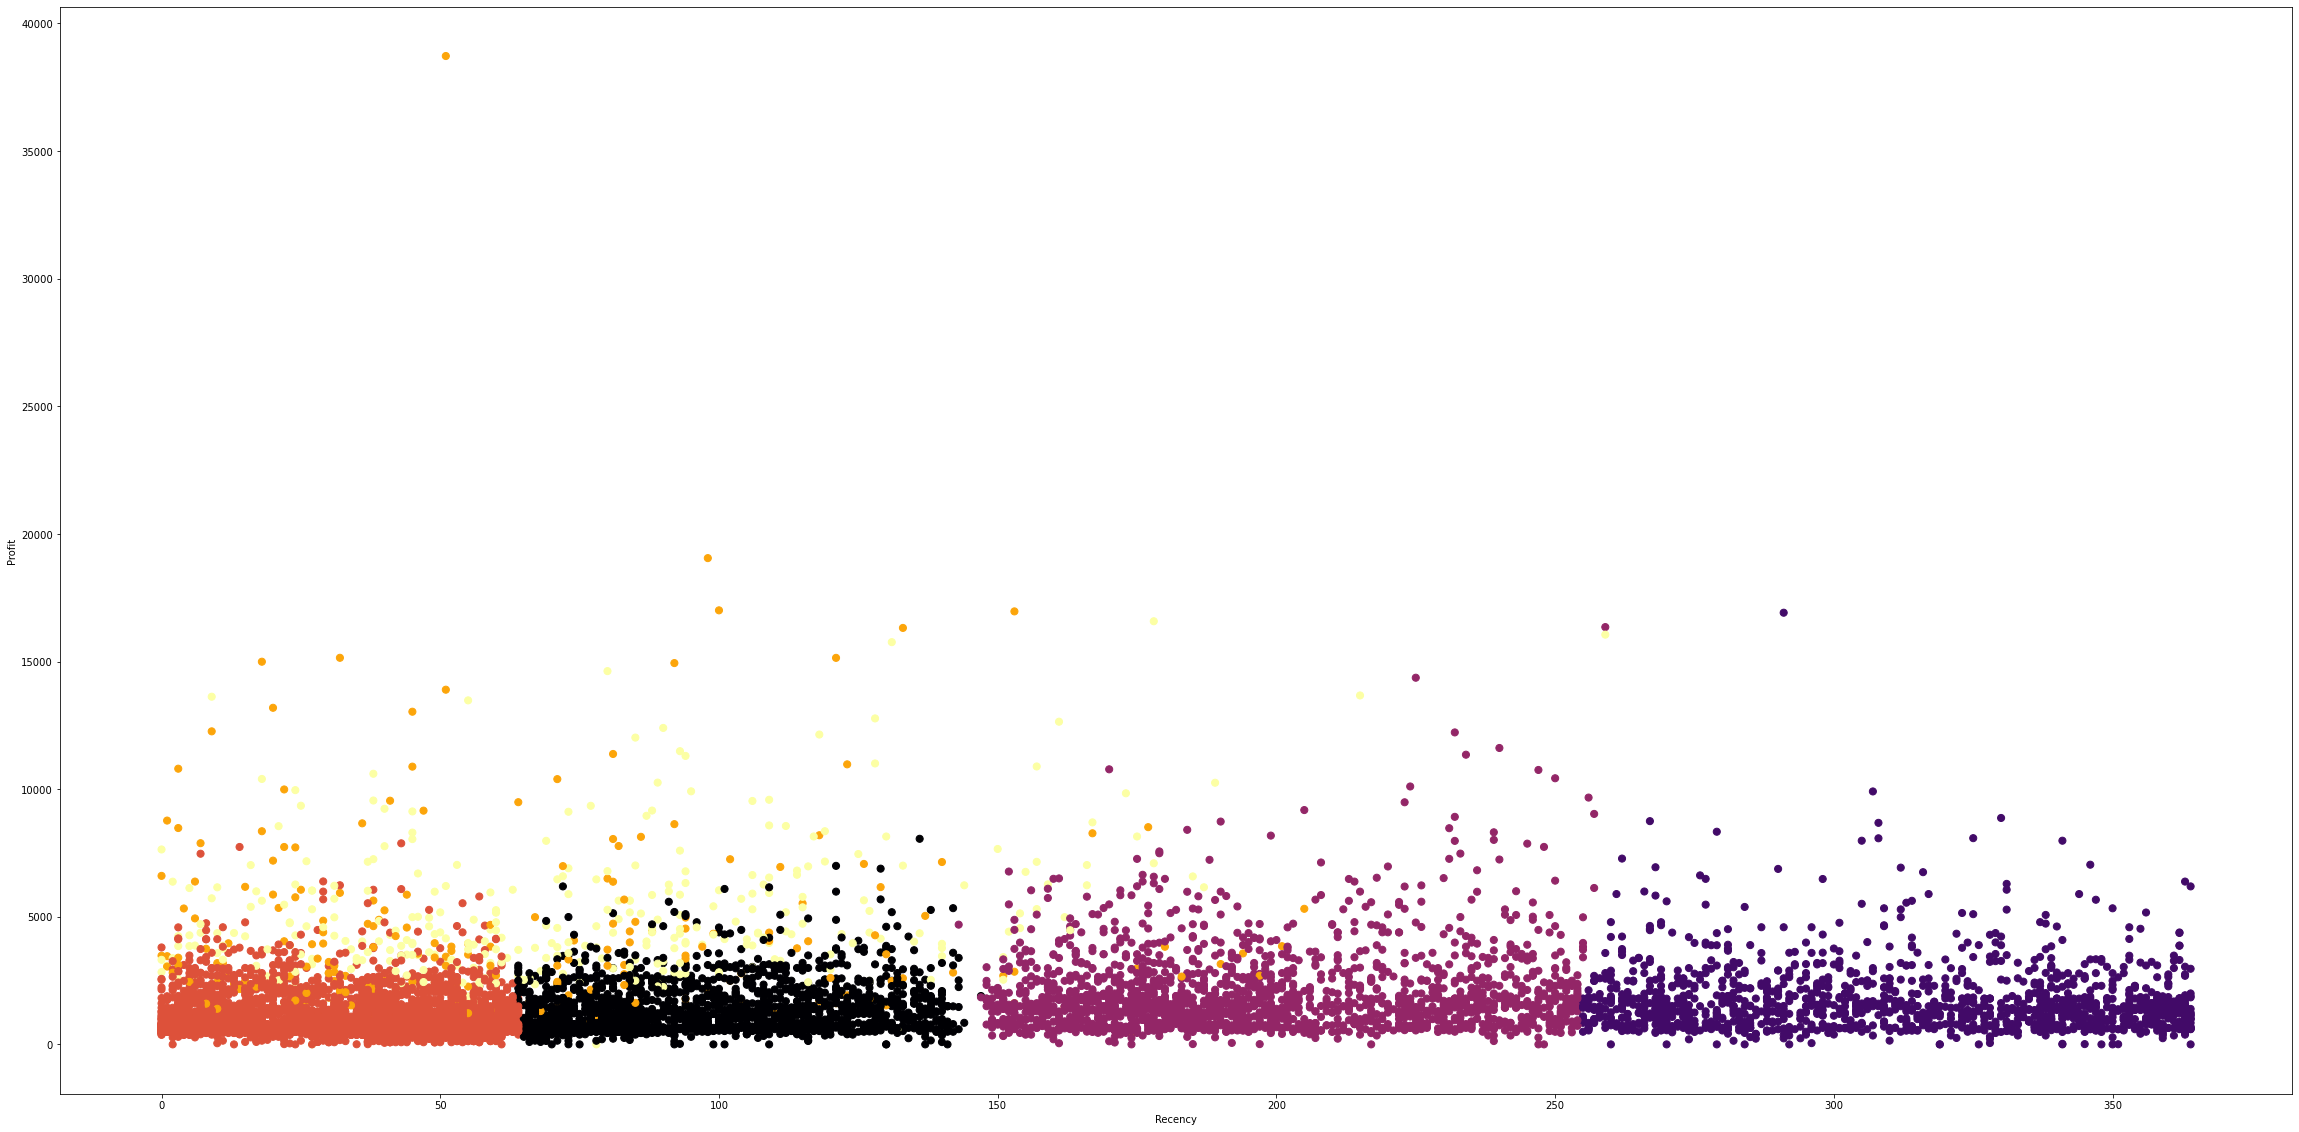

In [33]:
df_Recency=data_Clus[['Recency','Cluster',"Monetary"]]
plt.figure(figsize=(40,20))
plt.scatter(df_Recency.Recency, df_Recency["Monetary"], c=df_Recency['Cluster'], cmap='inferno',s=50);
plt.xlabel("Recency")
plt.ylabel("Profit")
plt.show()

df_Monetary=df_normalized[['Recency','Profit','Cluster',"Monetary"]]
plt.figure(figsize=(20,10))

plt.scatter(df_Monetary.Monetary[df_Monetary.Cluster == 1], df_Monetary["Profit"][df_Monetary.Cluster == 1], c='red', s=10)
plt.scatter(df_Monetary.Monetary[df_Monetary.Cluster == 2], df_Monetary["Profit"][df_Monetary.Cluster == 2], c='green', s=10)
plt.scatter(df_Monetary.Monetary[df_Monetary.Cluster == 3], df_Monetary["Profit"][df_Monetary.Cluster == 3], c='cyan', s=10)
plt.scatter(df_Monetary.Monetary[df_Monetary.Cluster == 4], df_Monetary["Profit"][df_Monetary.Cluster == 4], c='magenta', s=10)
plt.scatter(df_Monetary.Monetary[df_Monetary.Cluster == 5], df_Monetary["Profit"][df_Monetary.Cluster == 5], c='blue', s=10)
plt.scatter(df_Monetary.Monetary[df_Monetary.Cluster == 6], df_Monetary["Profit"][df_Monetary.Cluster == 6], c='yellow', s=10)

plt.xlabel("Monetary")
plt.ylabel("Profit")
plt.legend()
plt.show()

df_Frequency=df_normalized[['Frequency','Profit','Cluster',"Monetary"]]
plt.figure(figsize=(20,10))

plt.scatter(df_Frequency.Frequency[df_Frequency.Cluster == 1], df_Frequency["Profit"][df_Frequency.Cluster == 1], c='red', s=60)
plt.scatter(df_Frequency.Frequency[df_Frequency.Cluster == 2], df_Frequency["Profit"][df_Frequency.Cluster == 2], c='green', s=60)
plt.scatter(df_Frequency.Frequency[df_Frequency.Cluster == 3], df_Frequency["Profit"][df_Frequency.Cluster == 3], c='cyan', s=60)
plt.scatter(df_Frequency.Frequency[df_Frequency.Cluster == 4], df_Frequency["Profit"][df_Frequency.Cluster == 4], c='magenta', s=60)
plt.scatter(df_Frequency.Frequency[df_Frequency.Cluster == 5], df_Frequency["Profit"][df_Frequency.Cluster == 5], c='blue', s=60)
plt.scatter(df_Frequency.Frequency[df_Frequency.Cluster == 6], df_Frequency["Profit"][df_Frequency.Cluster == 6], c='yellow', s=60)

plt.xlabel("Frequency")
plt.ylabel("Profit")
plt.legend()
plt.show()

##### Hierarchal clustering with dendrograms

In [34]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
np.set_printoptions(precision=4, suppress=True)

In [35]:
distance = linkage(df_data_seg, 'ward')

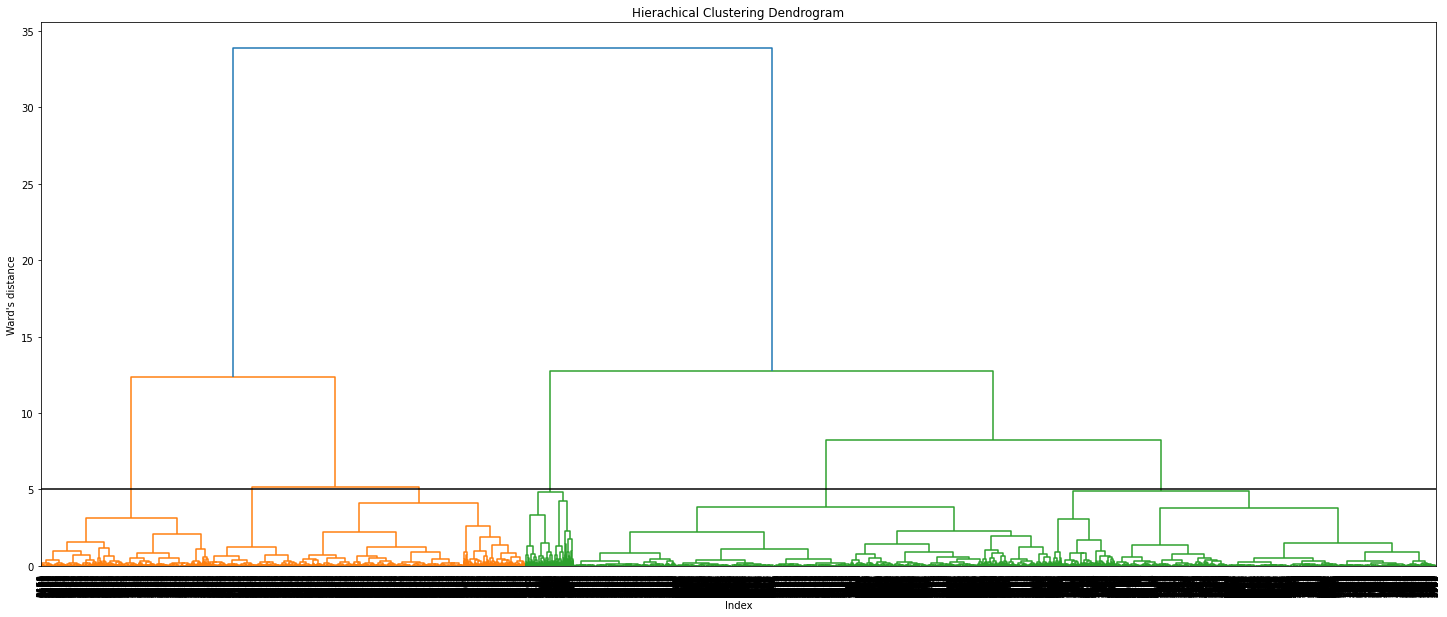

In [36]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,
           leaf_rotation=90.,
           leaf_font_size=9.,);
plt.axhline(5, c='k');

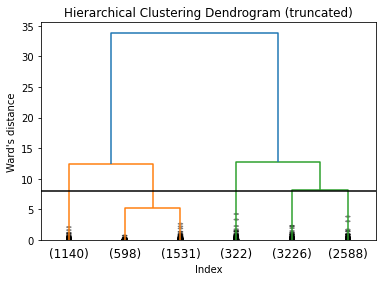

In [37]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
dendrogram(distance, truncate_mode='lastp',
           p=6, leaf_rotation=0., leaf_font_size=12.,
           show_contracted=True);
plt.axhline(8, c='k');

### Retrieve the Clusters

* Utilise the [fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html) function.

* Retrieve by distance or number of clusters

##### By distance

In [38]:
from scipy.cluster.hierarchy import fcluster
max_d = 6
clusters = fcluster(distance, max_d, criterion='distance')
clusters

array([5, 3, 5, ..., 4, 4, 4], dtype=int32)

In [39]:
df_data_seg['Cluster'] = clusters

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'Recency')

Text(0, 0.5, 'Monetary')

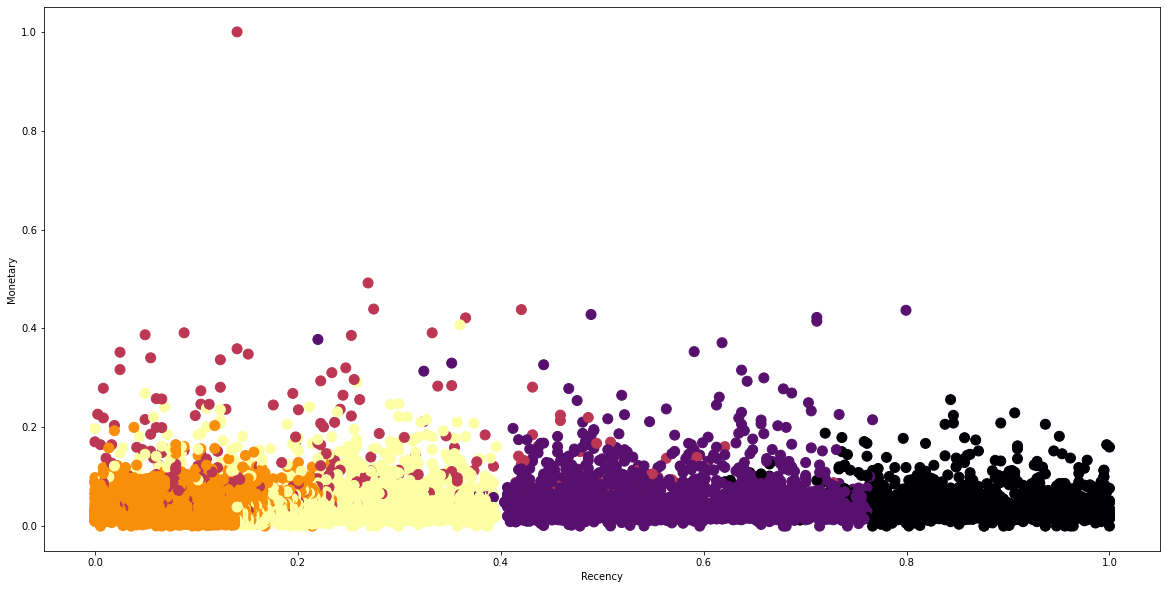

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(df_data_seg.Recency, df_data_seg["Monetary"], c=clusters, cmap='inferno',s=100);
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Monetary')

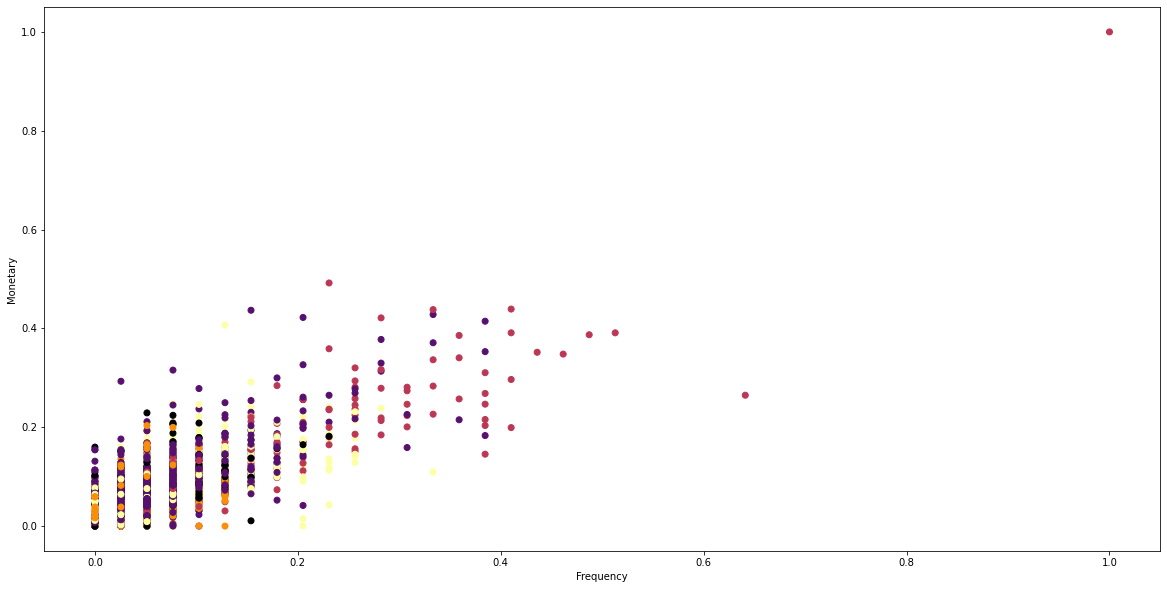

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(df_data_seg.Frequency, df_data_seg["Monetary"], c=clusters, cmap='inferno');
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.show()

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'numProduct')

Text(0, 0.5, 'Monetary')

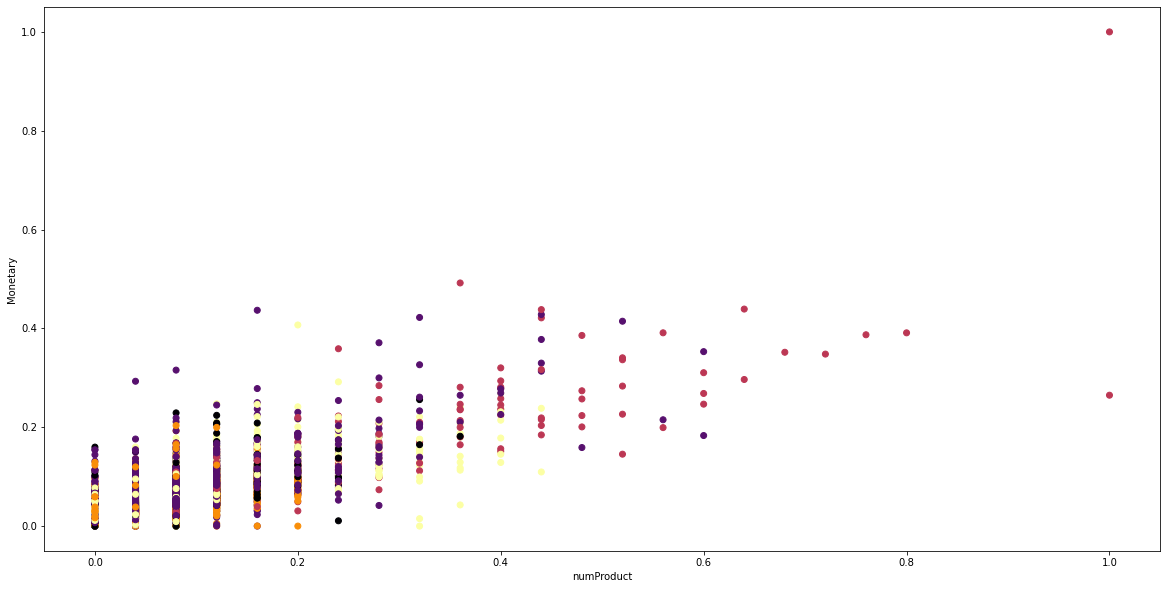

In [43]:
plt.figure(figsize=(20,10))
plt.scatter(df_data_seg.numProduct, df_data_seg["Monetary"], c=clusters, cmap='inferno');
plt.xlabel("numProduct")
plt.ylabel("Monetary")
plt.show()